In [1]:
import torch as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt

In [2]:
BATCH_SIZE = 50

In [4]:
#this is from pytorch documentation for training on imagenet
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
transform = transforms.Compose([
    transforms.RandomResizedCrop(224), # they do it centered
    transforms.RandomHorizontalFlip(), #if we flip it before getting the representation then we have to do it for the diffusin model too
    transforms.ToTensor(), 
    normalize, #seems that they don't do it at least for the SSL
])

In [5]:
#training dataset
train_dataset = datasets.ImageFolder(
    root='../data/train',
    transform=transform
)

# validation dataset
valid_dataset = datasets.ImageFolder(
    root='../data/val',
    transform=transform
)

#training data loaders
train_loader = DataLoader(
    train_dataset, batch_size=BATCH_SIZE, shuffle=True,
    num_workers=2, pin_memory=True
)

#validation data loaders
valid_loader = DataLoader(
    valid_dataset, batch_size=BATCH_SIZE, shuffle=False,
    num_workers=2, pin_memory=True
)

In [6]:
#train_img.shape = [BATCH_SIZE, 3, X_SIZE, Y_SIZE], classes.shape = [BATCH_SIZE]
train_iterator=iter(train_loader)
train_imgs, classes = next(train_iterator)
print(classes)


#for some motivations here the classes are all zeros
valid_iterator=iter(valid_loader)
val_imgs, classes = next(valid_iterator)
print(classes)


tensor([721, 447, 313, 280, 999, 230, 249, 459, 386, 730, 177, 434, 474, 495,
        856,  51, 823, 746, 252, 956,  85, 924, 706, 140, 164, 329, 699, 420,
        483, 288, 469, 171, 427, 300, 861, 933, 749,  39, 381, 416, 358, 405,
        363, 234, 734, 739, 845, 385, 513, 966])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


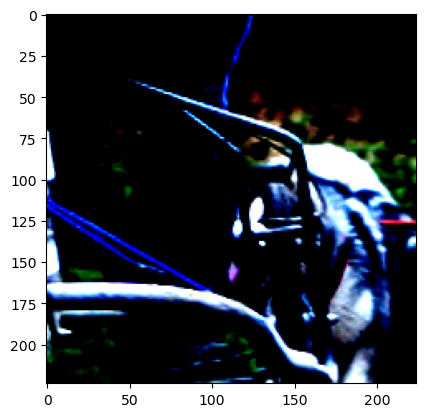

In [7]:
plt.imshow(  train_imgs[6].permute(1, 2, 0)  )